In [1]:
import os
import shutil
from EEG_utils.EEG_utils_Siena import *

In [2]:
num_points = 400

In [3]:
root_folder = "..\\..\\physionet.org\\files\\siena-scalp-eeg\\1.0.0\\"

# patient_id = "PN00"
# record_ids = ["1", "2", "4", "5"]

# patient_id = "PN06"
# record_ids = ["2", "3", "4", "5"]

patient_id = "PN14"
record_ids = ["1", "2", "3", "4"]

In [4]:
list_lag_nodes = [10] # [1, 5, 10, 20, 50]
list_num_node_features = [10] # [3, 5, 10, 20, 30, 50]

top_k_edges = 4
corr_sec = 5

In [5]:
def sposta_file(cartella_origine, cartella_destinazione):
    # Controlla se la cartella di destinazione esiste, altrimenti la crea
    if not os.path.exists(cartella_destinazione):
        os.makedirs(cartella_destinazione)

    # Scorre tutti i file nella cartella di origine
    for elemento in os.listdir(cartella_origine):
        percorso_elemento = os.path.join(cartella_origine, elemento)
        
        # Verifica se l'elemento è un file e non una cartella
        if os.path.isfile(percorso_elemento):
            # Sposta il file nella cartella di destinazione
            shutil.move(percorso_elemento, cartella_destinazione)
            print(f"      File {elemento} spostato in {cartella_destinazione}")

  Distanza 10
   Node feature 10
     PN14_1
Extracting EDF parameters from c:\Users\zanno\physionet.org\files\siena-scalp-eeg\1.0.0\PN14\PN14-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 7.0, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 1270
skip 1: 32


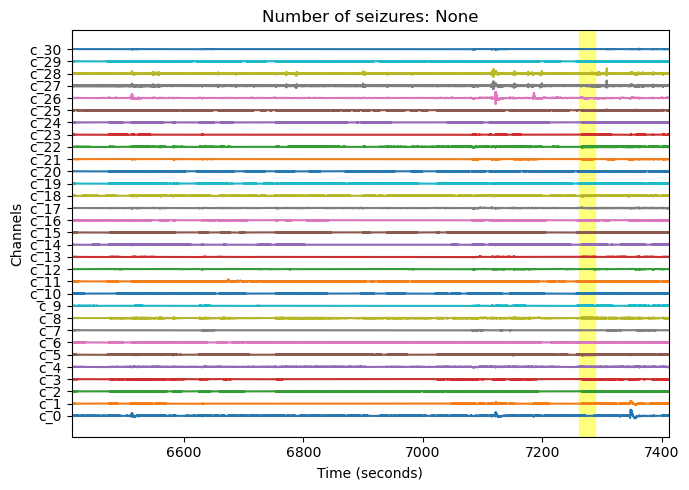

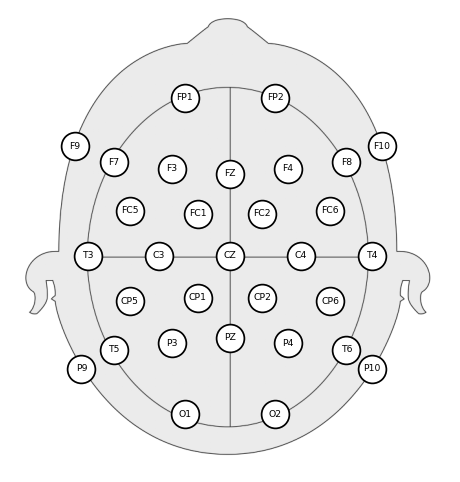

     PN14_2
Extracting EDF parameters from c:\Users\zanno\physionet.org\files\siena-scalp-eeg\1.0.0\PN14\PN14-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 7.0, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 1271
skip 1: 14


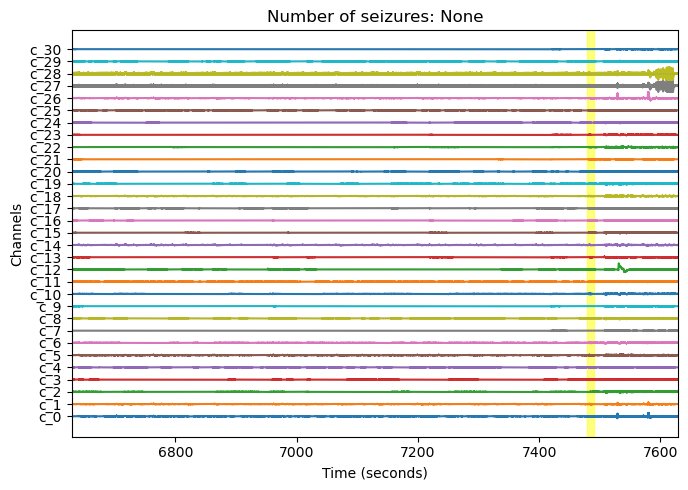

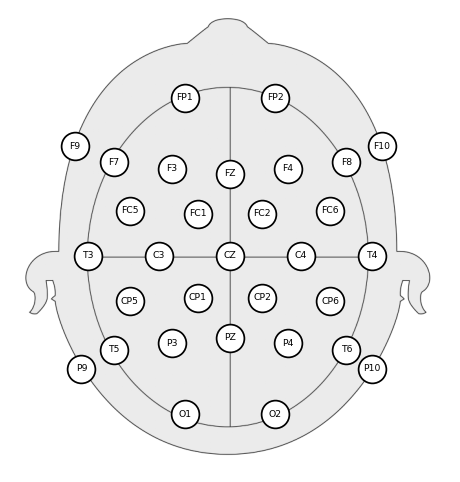

     PN14_3
Extracting EDF parameters from c:\Users\zanno\physionet.org\files\siena-scalp-eeg\1.0.0\PN14\PN14-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 7.0, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 1269
skip 1: 49


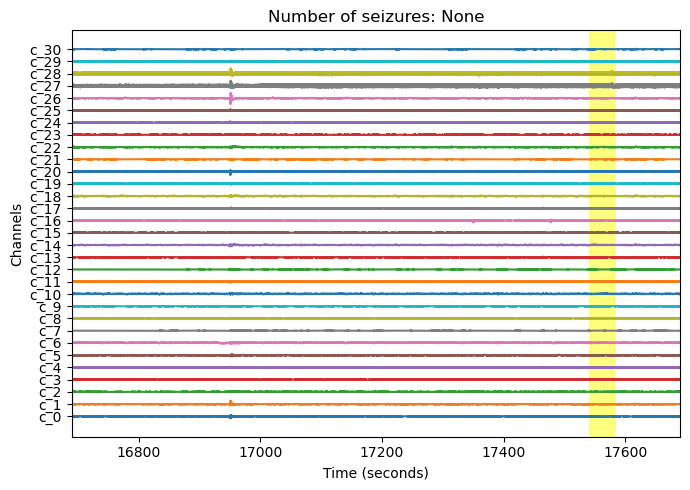

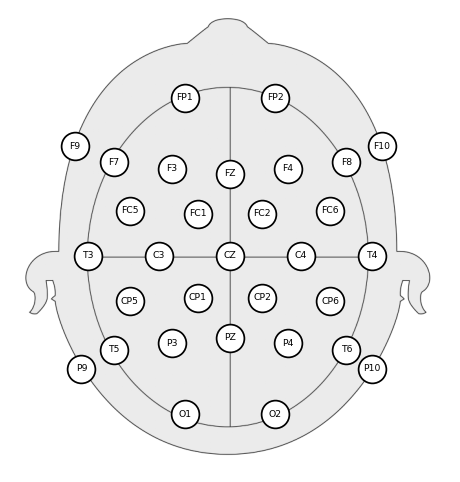

     PN14_4
Extracting EDF parameters from c:\Users\zanno\physionet.org\files\siena-scalp-eeg\1.0.0\PN14\PN14-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:152: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 7.0, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


skip 0: 1267
skip 1: 100


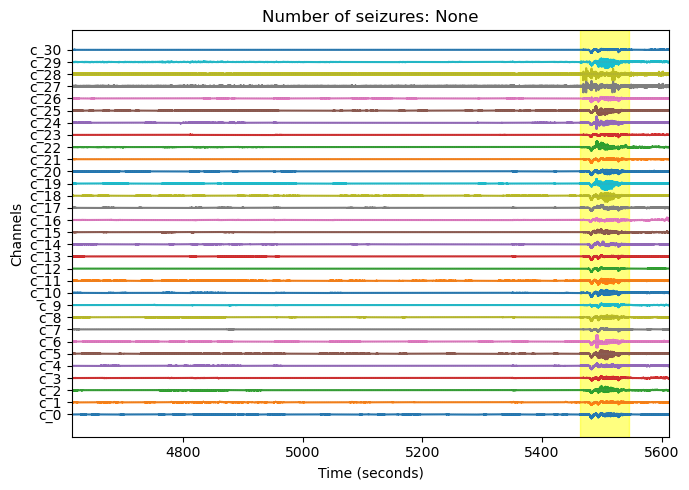

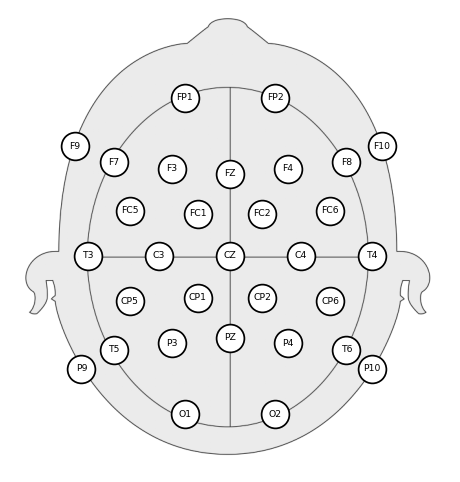

      File dataset_PN14_1.json spostato in EEG_data/Distanza 10/10 node feature
      File dataset_PN14_2.json spostato in EEG_data/Distanza 10/10 node feature
      File dataset_PN14_3.json spostato in EEG_data/Distanza 10/10 node feature
      File dataset_PN14_4.json spostato in EEG_data/Distanza 10/10 node feature
      File EEG_data_params_PN14_1.pkl spostato in EEG_data/Distanza 10/10 node feature
      File EEG_data_params_PN14_2.pkl spostato in EEG_data/Distanza 10/10 node feature
      File EEG_data_params_PN14_3.pkl spostato in EEG_data/Distanza 10/10 node feature
      File EEG_data_params_PN14_4.pkl spostato in EEG_data/Distanza 10/10 node feature
      File mid_points_PN14_1.pkl spostato in EEG_data/Distanza 10/10 node feature
      File mid_points_PN14_2.pkl spostato in EEG_data/Distanza 10/10 node feature
      File mid_points_PN14_3.pkl spostato in EEG_data/Distanza 10/10 node feature
      File mid_points_PN14_4.pkl spostato in EEG_data/Distanza 10/10 node feature
----

In [6]:
for lag_nodes in list_lag_nodes:
    print(f"  Distanza {lag_nodes}")
    for num_node_features in list_num_node_features:
        print(f"   Node feature {num_node_features}")
        for record_id in record_ids:
            print(f"     {patient_id}_{record_id}")
            patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=num_points, num_node_features=num_node_features, lag_nodes=lag_nodes, top_k_edges=top_k_edges, corr_sec=corr_sec)
            patient.extract_seizure_info()
            patient.load_data()
            patient.plot_signals()
            patient.compute_indices()
            export_data_to_GRETEL(patient)
            export_coordinates(patient)
        sposta_file("EEG_data", f"EEG_data/Distanza {lag_nodes}/{num_node_features} node feature")
        print("-----------------------------")

# __________________________________________________________________________

In [7]:
import datetime

now = datetime.datetime.now()
print("Last full run:", now.strftime("%d/%m/%Y, ore %H:%M"))

Last full run: 06/07/2025, ore 09:18


In [8]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)